In this notebook I will be implementing **Single Linear Regression** on Stipend and KC house dataset and 
**Multiple Linear Regression** on Startups dataset

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Simple Linear Regression

## Stipend

In [2]:
data = pd.read_csv(r'E:\Jupyterfiles\ML_practice\Stipend_Data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
data.isnull()

,YearsExperience,Salary
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


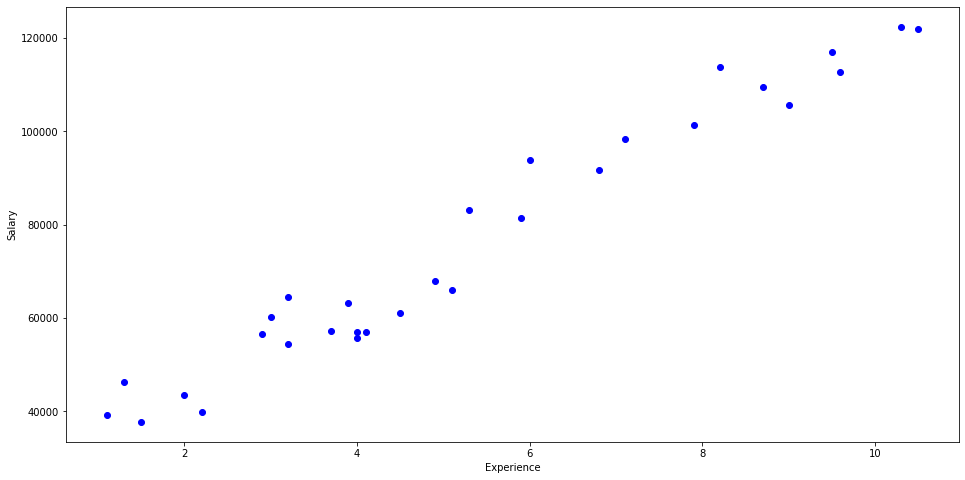

In [4]:
plt.figure(figsize = (16, 8))
plt.scatter(
    data['YearsExperience'],
    data['Salary'],
    c = 'blue'
)
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.show()

In [5]:
x = data['YearsExperience'].values.reshape(-1,1)
y = data['Salary'].values.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.35)

In [6]:
reg = LinearRegression()
reg.fit(x_train, y_train)
print("The linear model is: Stipend = {:.5} + {:.5}(Experience)".format(reg.intercept_[0], reg.coef_[0][0]))

The linear model is: Stipend = 2.6596e+04 + 9186.6(Experience)


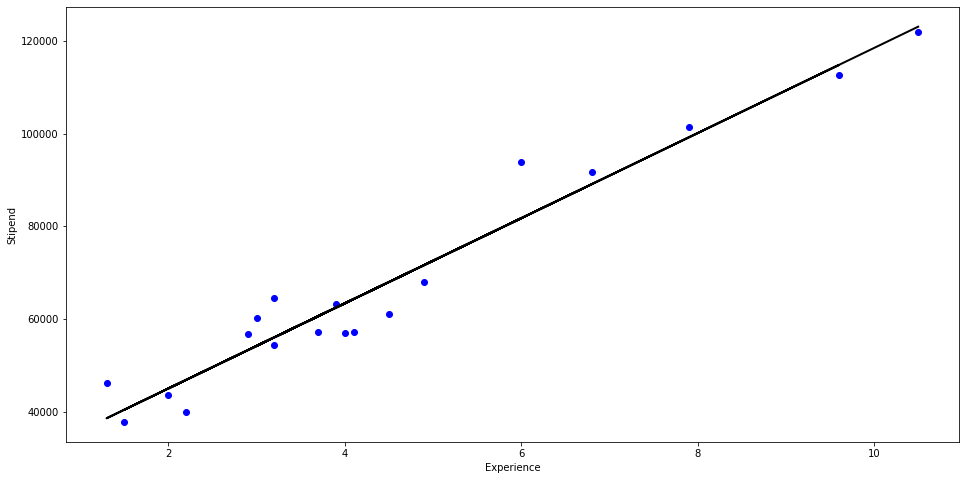

In [7]:
predictions = reg.predict(x_train)
plt.figure(figsize = (16, 8))
plt.scatter(
     x_train,
     y_train,
     c = 'blue'
)
plt.plot(
    x_train,
    predictions,
    c = 'black',
    linewidth = 2
)
plt.xlabel("Experience")
plt.ylabel("Stipend")
plt.show()

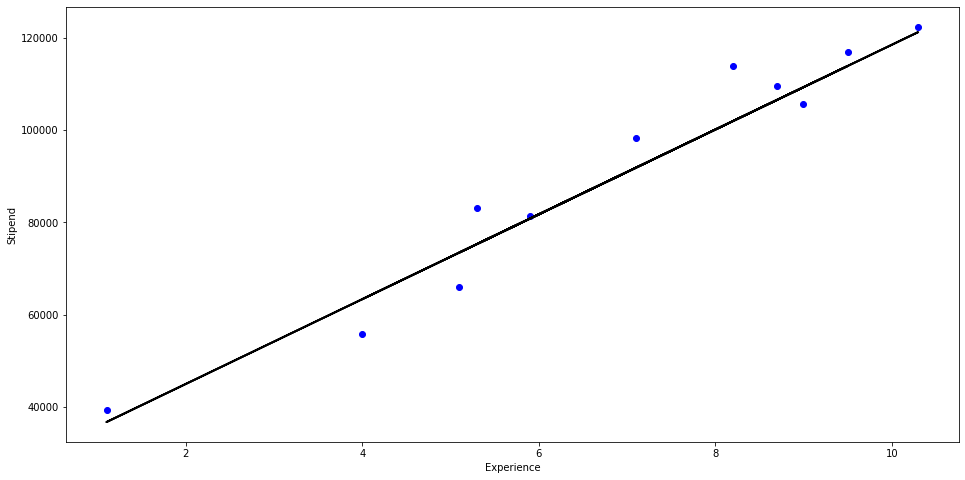

In [8]:
predictions = reg.predict(x_test)
plt.figure(figsize = (16, 8))
plt.scatter(
     x_test,
     y_test,
     c = 'blue'
)
plt.plot(
    x_test,
    predictions,
    c = 'black',
    linewidth = 2
)
plt.xlabel("Experience")
plt.ylabel("Stipend")
plt.show()

### Error metrics

1. Mean Absolute Error

2. Mean Squared Error

3. Root Mean Square Error

In [9]:
print("Mean Absolute Error: ", mean_absolute_error(y_test, predictions))
print("Mean Squared Error: ", mean_squared_error(y_test, predictions))
print("Root Mean Square Error: ", np.sqrt(mean_squared_error(y_test, predictions)))

Mean Absolute Error:  5017.856391594352
Mean Squared Error:  36020767.28994915
Root Mean Square Error:  6001.7303579842


## KC house

In [10]:
data = pd.read_csv(r'E:\Jupyterfiles\ML_practice\Kaggle\kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


**There are many columns I will formulate a linear regression using sqft_living and price**

In [11]:
x = data['sqft_living'].values.reshape(-1,1)
y = data['price'].values.reshape(-1,1)

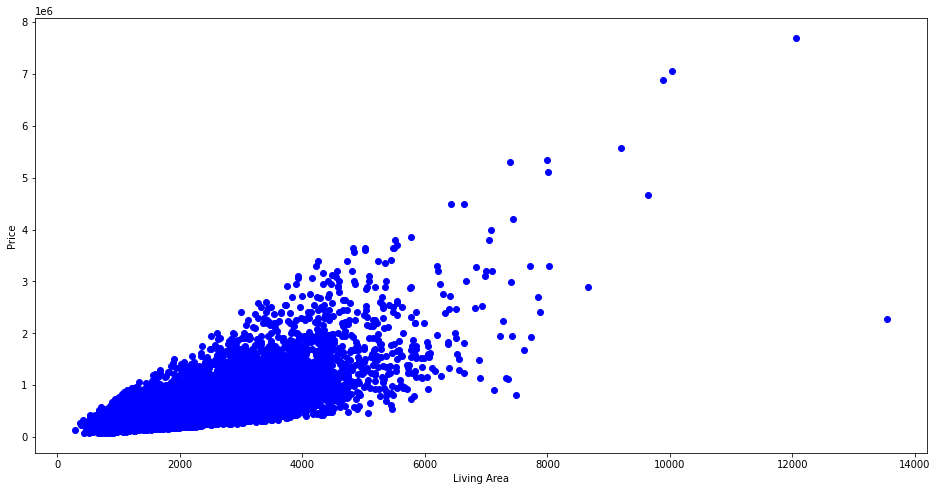

In [12]:
plt.figure(figsize=(16, 8))
plt.scatter(
    data['sqft_living'],
    data['price'],
    c='blue'
)
plt.xlabel("Living Area")
plt.ylabel("Price")
plt.show()

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

In [14]:
reg = LinearRegression()
reg.fit(x_train, y_train)
print("The linear model is: Price = {:.5} + {:.5}(Living Area)".format(reg.intercept_[0], reg.coef_[0][0]))

The linear model is: Price = -4.2587e+04 + 279.94(Living Area)


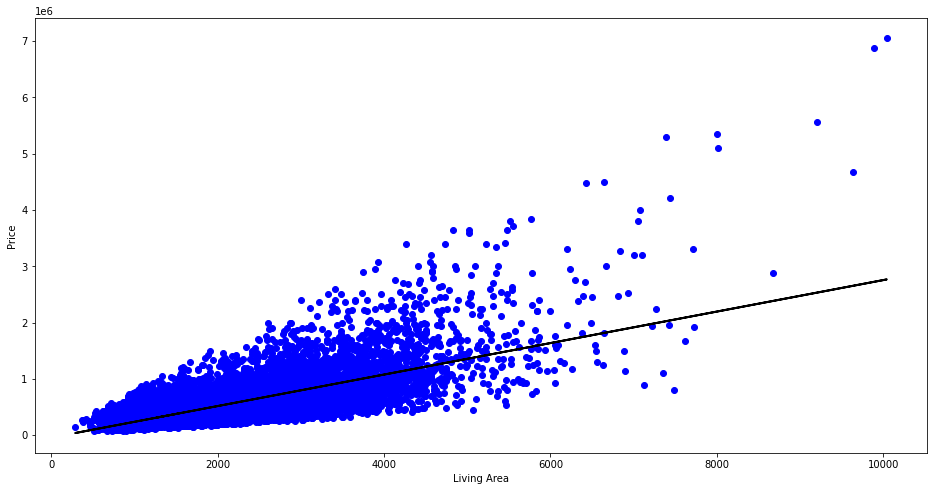

In [15]:
predictions = reg.predict(x_train)
plt.figure(figsize=(16, 8))
plt.scatter(
     x_train,
     y_train,
     c='blue'
)
plt.plot(
    x_train,
    predictions,
    c='black',
    linewidth=2
)
plt.xlabel("Living Area")
plt.ylabel("Price")
plt.show()

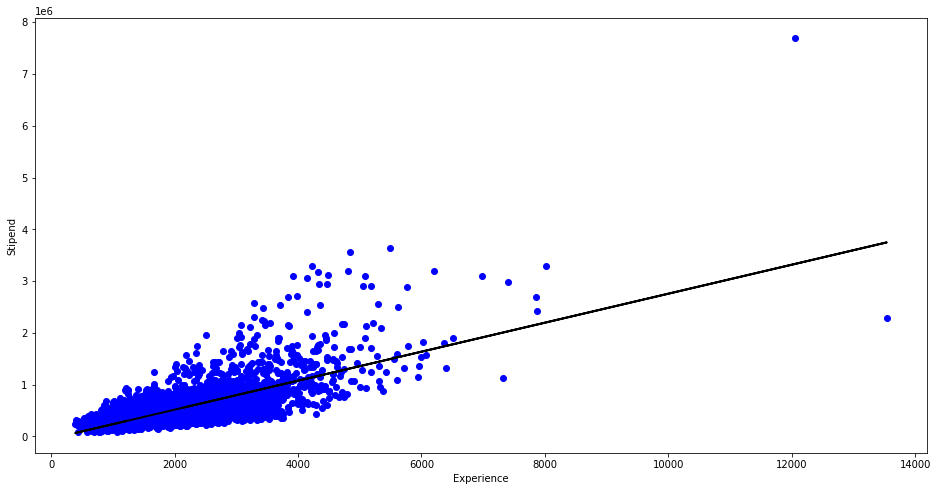

In [16]:
predictions = reg.predict(x_test)
plt.figure(figsize=(16, 8))
plt.scatter(
     x_test,
     y_test,
     c='blue'
)
plt.plot(
    x_test,
    predictions,
    c='black',
    linewidth=2
)
plt.xlabel("Experience")
plt.ylabel("Stipend")
plt.show()

### Error metrics

In [17]:
print("Mean absolute error", mean_absolute_error(y_test, predictions))
print("Mean squared error", mean_squared_error(y_test, predictions))
print("Root Mean squared error", np.sqrt(mean_squared_error(y_test, predictions)))

Mean absolute error 174236.26069032107
Mean squared error 72384078607.29404
Root Mean squared error 269042.893619761


# Multiple Linear Regression

In [18]:
data = pd.read_csv(r'E:\Jupyterfiles\ML_practice\50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [19]:
x = data.iloc[:, :-1].values
y = data.iloc[:, 4].values

In [20]:
le = LabelEncoder()
x[:, 3] = le.fit_transform(x[:, 3])
ct = ColumnTransformer([("State", OneHotEncoder(), [3])], remainder = 'passthrough')
x = ct.fit_transform(x)

In [21]:
x = x[:, 1:]
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2)

In [22]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [23]:
print(regressor.predict(X_test))

[ 64033.12897827 115126.77431176  89728.24584417  83559.12646602
  91378.93196312 102007.77759585 147655.64151818 114766.4356207
 161037.08195461 189499.89781562]


In [24]:
x = np.append(arr = np.ones((50, 1)).astype(int), values = x, axis = 1)
x_opt = x[:, [0, 1, 2, 3, 4, 5]]
x_opt = np.array(x_opt, dtype = float)
regressor_OLS = sm.OLS(endog = y, exog = x_opt).fit()

In [25]:
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Mon, 05 Oct 2020   Prob (F-statistic):           1.34e-27
Time:                        14:32:05   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
x1           198.7888   3371.007      0.059      0.953   -6595.030    6992.607
x2           -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
x3             0.8060      0.046     17.369      0.000       0.712       0.900
x4            -0.0270      0.052     -0.517      0.608      -0.132       0.078
x5             0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**There are 5 coefficients. Need to reduce them to one**

In [26]:
x_opt = x[:, [0, 1, 3, 4, 5]]
x_opt = np.array(x_opt, dtype = float)
regressor_OLS = sm.OLS(endog = y, exog = x_opt).fit()

regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Mon, 05 Oct 2020   Prob (F-statistic):           8.49e-29
Time:                        14:32:19   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.011e+04   6647.870      7.537      0.000    3.67e+04    6.35e+04
x1           220.1585   2900.536      0.076      0.940   -5621.821    6062.138
x2             0.8060      0.046     17.606      0.000       0.714       0.898
x3            -0.0270      0.052     -0.523      0.604      -0.131       0.077
x4             0.0270      0.017      1.592      0.118      -0.007       0.061
==============================================================================
Omnibus:                       14.758   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.172
Skew:                          -0.948   Prob(JB):                     2.53e-05
Kurtosis:                       5.563   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
x_opt = x[:, [0, 1, 3, 5]]
x_opt = np.array(x_opt, dtype = float)
regressor_OLS = sm.OLS(endog = y, exog = x_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     294.1
Date:                Mon, 05 Oct 2020   Prob (F-statistic):           5.19e-30
Time:                        14:32:45   Log-Likelihood:                -525.53
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1067.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.695e+04   2761.499     17.002      0.000    4.14e+04    5.25e+04
x1           150.7580   2874.516      0.052      0.958   -5635.342    5936.858
x2             0.7967      0.042     19.024      0.000       0.712       0.881
x3             0.0298      0.016      1.863      0.069      -0.002       0.062
==============================================================================
Omnibus:                       14.628   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.992
Skew:                          -0.938   Prob(JB):                     2.76e-05
Kurtosis:                       5.560   Cond. No.                     5.99e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.99e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
x_opt = x[:, [0, 3, 5]]
x_opt = np.array(x_opt, dtype = float)
regressor_OLS = sm.OLS(endog = y, exog = x_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Mon, 05 Oct 2020   Prob (F-statistic):           2.16e-31
Time:                        14:32:58   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
x1             0.7966      0.041     19.266      0.000       0.713       0.880
x2             0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
x_opt = x[:, [0, 3]]
x_opt = np.array(x_opt, dtype = float)
regressor_OLS = sm.OLS(endog = y, exog = x_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Mon, 05 Oct 2020   Prob (F-statistic):           3.50e-32
Time:                        14:33:31   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
x1             0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Reduced to single coefficient